<a href="https://colab.research.google.com/github/Asif520/Pytorch_learning_projects/blob/main/Mnist_with_CNN_using_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#convert mnist images into 4 dimension tensors
transform = transforms.ToTensor()

In [3]:
#Train data
train_data = datasets.MNIST(root='/cnn_data',train=True, download=True,transform = transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15964721.64it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 497957.76it/s]


Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4463985.09it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 10923468.33it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
#Test data
test_data = datasets.MNIST(root='/cnn_data',train=False, download=True,transform = transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [24]:
#load & Shuffle in Batch
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [25]:
 #Create CNN Model
class ConvNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #fully Connceted Layer
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    # review to flatten it out
    X = X.view(-1,5*5*16)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X,dim=1)



In [26]:
#Create an instance of our model
torch.manual_seed(41)
model = ConvNetwork()
model

ConvNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
#Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [28]:
import time
start_time = time.time()

#Epochs
epochs = 5

#create variables to track things
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For loop for epochs
for i in range(epochs):
  train_corr=0
  test_corr = 0

  #Train Data
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train) #get predicted value
    loss = criterion(y_pred,y_train)

    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted==y_train).sum()
    train_corr+=batch_corr

    #Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Details
    if b % 600 == 0:
      print(f'Epoch: {i}, batch: {b} loss : {loss.item()}')

  train_losses.append(loss)
  train_correct.append(train_corr)


  #Test Data
  with torch.no_grad():
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test) #get predicted value

      predicted = torch.max(y_val.data,1)[1]
      test_corr += (predicted==y_test).sum()


  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(test_corr)



current_time = time.time()
total_time = current_time-start_time
print(f'Training took {total_time/60} minitues!')

Epoch: 0, batch: 600 loss : 0.1623610556125641
Epoch: 0, batch: 1200 loss : 0.1502392590045929
Epoch: 0, batch: 1800 loss : 0.4744560718536377
Epoch: 0, batch: 2400 loss : 0.14238706231117249
Epoch: 0, batch: 3000 loss : 0.007758188061416149
Epoch: 0, batch: 3600 loss : 0.3836284875869751
Epoch: 0, batch: 4200 loss : 0.0038223876617848873
Epoch: 0, batch: 4800 loss : 0.0021286322735249996
Epoch: 0, batch: 5400 loss : 0.0569545142352581
Epoch: 0, batch: 6000 loss : 0.00038789428072050214
Epoch: 1, batch: 600 loss : 0.005851339548826218
Epoch: 1, batch: 1200 loss : 0.3855525553226471
Epoch: 1, batch: 1800 loss : 0.004819948226213455
Epoch: 1, batch: 2400 loss : 0.003216963727027178
Epoch: 1, batch: 3000 loss : 0.0332382395863533
Epoch: 1, batch: 3600 loss : 0.5372857451438904
Epoch: 1, batch: 4200 loss : 0.04561494290828705
Epoch: 1, batch: 4800 loss : 0.0007510822033509612
Epoch: 1, batch: 5400 loss : 0.0001173773780465126
Epoch: 1, batch: 6000 loss : 0.14201366901397705
Epoch: 2, batch

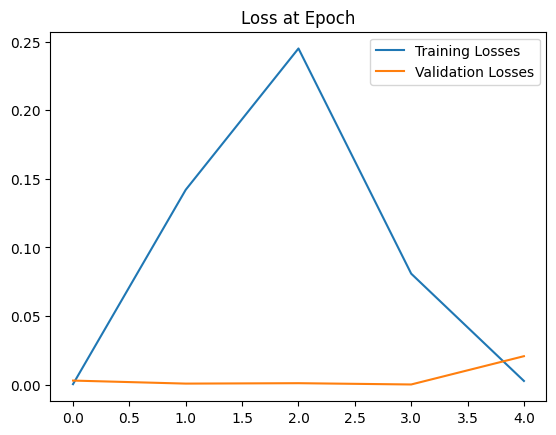

In [29]:
# Plot losses with Graph
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Losses")
plt.plot(test_losses, label = "Validation Losses")
plt.title('Loss at Epoch')
plt.legend()


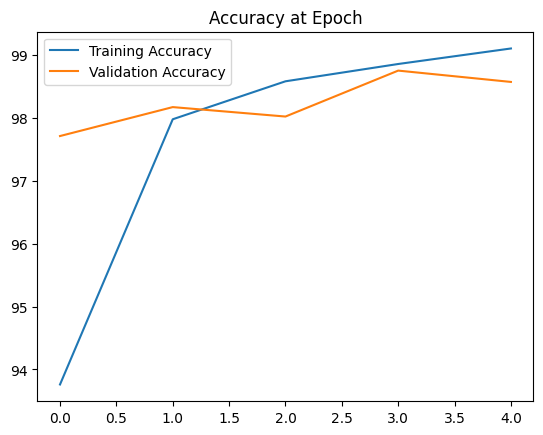

In [30]:
plt.plot([t/600 for t in train_correct] , label = "Training Accuracy")# check after every batch
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title('Accuracy at Epoch')
plt.legend()

In [31]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [32]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_everything:
      y_val = model(X_test) #get predicted value

      predicted = torch.max(y_val.data,1)[1]
      correct += (predicted==y_test).sum()

In [36]:
correct.item()/len(test_data) *100

98.57000000000001

In [39]:
test_data[6164][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

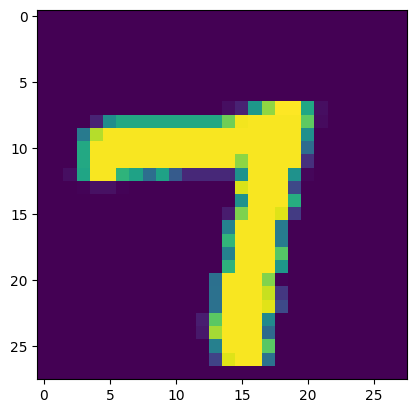

In [40]:
plt.imshow(test_data[6164][0].reshape(28,28))

tensor(6)

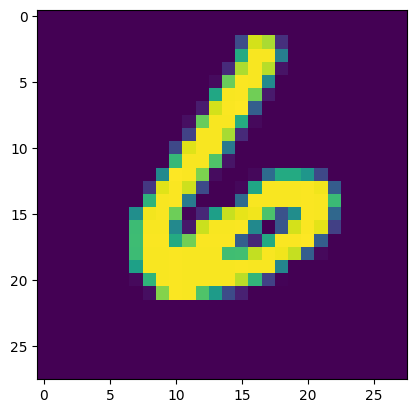

In [53]:
# Pass an image thru the model
i=8888
plt.imshow(test_data[i][0].reshape(28,28))

model.eval()
with torch.no_grad():
  new_pred = model(test_data[i][0].view(1,1,28,28))
new_pred.argmax()
